In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import glob

csv_list = []
for csv in glob.glob("C:/Users/kimba/OneDrive/Desktop/Cyclistic Analysis/CSVs/*"):
    csv_list.append(pd.read_csv(csv, index_col=None, header=0))

df = pd.concat(csv_list, axis=0, ignore_index=True)

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual


In [4]:
df.dtypes, df.shape

(ride_id                object
 rideable_type          object
 started_at             object
 ended_at               object
 start_station_name     object
 start_station_id       object
 end_station_name       object
 end_station_id         object
 start_lat             float64
 start_lng             float64
 end_lat               float64
 end_lng               float64
 member_casual          object
 dtype: object,
 (5378834, 13))

In [5]:
f = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
df['started_at'] = df['started_at'].apply(f)
df['ended_at'] = df['ended_at'].apply(f)


In [6]:
df['ride_length'] = df['ended_at'] - df['started_at']
df['ride_length'] = df['ride_length'].apply(lambda x: x.total_seconds() / 60)

In [7]:
df['ride_length'].groupby(df['member_casual']).mean()

member_casual
casual    31.639730
member    11.017909
Name: ride_length, dtype: float64

In [8]:
ride_length_by_member = df.loc[:, ['ride_length', 'member_casual']]
ride_length_by_member

,ride_length,member_casual
0,9.666667,casual
1,11.316667,casual
2,29.016667,casual
3,9.250000,casual
4,33.450000,casual
...,...,...
5378829,22.333333,casual
5378830,22.566667,casual
5378831,5.550000,member
5378832,5.466667,member


<AxesSubplot:xlabel='member_casual', ylabel='ride_length'>

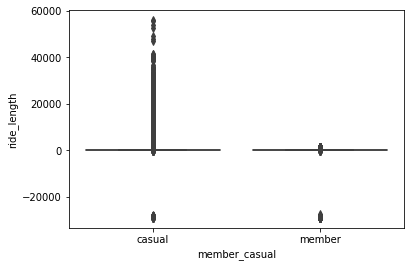

In [9]:
sns.boxplot(x='member_casual', y='ride_length', data=ride_length_by_member)

In [10]:
ride_length_by_member.groupby('member_casual').describe()

ride_length                                                 \
                    count       mean         std           min       25%   
member_casual                                                              
casual          2470517.0  31.639730  309.455191 -28995.916667  9.283333   
member          2908317.0  11.017909  291.377745 -29049.966667  5.750000   

                                                   
                     50%        75%           max  
member_casual                                      
casual         16.366667  29.983333  55944.150000  
member          9.900000  17.083333   1559.933333

<AxesSubplot:xlabel='member_casual', ylabel='ride_length'>

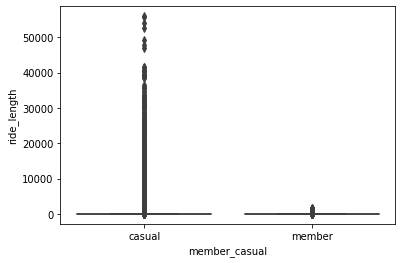

In [11]:
rl_by_mem_clean = ride_length_by_member[ride_length_by_member['ride_length'] >= 0]

sns.boxplot(x='member_casual', y='ride_length', data=rl_by_mem_clean)

In [12]:
rl_by_mem_clean.groupby('member_casual').describe()

ride_length                                                   \
                    count       mean         std  min       25%        50%   
member_casual                                                                
casual          2470218.0  32.557165  263.882747  0.0  9.283333  16.366667   
member          2907223.0  13.963191   27.638507  0.0  5.766667   9.916667   

                                        
                     75%           max  
member_casual                           
casual         29.983333  55944.150000  
member         17.083333   1559.933333

In [13]:
df['day_of_week'] = df['started_at'].apply(lambda x: x.weekday())

In [14]:
day_of_week_by_member = pd.crosstab(df['day_of_week'], df['member_casual'])

day_of_week_by_member_norm = pd.crosstab(df['day_of_week'], df['member_casual'], normalize='columns')
day_of_week_by_member, day_of_week_by_member_norm

(member_casual  casual  member
 day_of_week                  
 0              278268  391381
 1              264350  431849
 2              267485  444387
 3              277344  425671
 4              354993  425245
 5              551882  421290
 6              476195  368494,
 member_casual    casual    member
 day_of_week                      
 0              0.112636  0.134573
 1              0.107002  0.148488
 2              0.108271  0.152799
 3              0.112262  0.146363
 4              0.143692  0.146217
 5              0.223387  0.144857
 6              0.192751  0.126704)

<ipython-input-16-3aeb20f54881>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(["", "Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"])


<AxesSubplot:xlabel='Day of Week', ylabel='Proportion of Riders'>

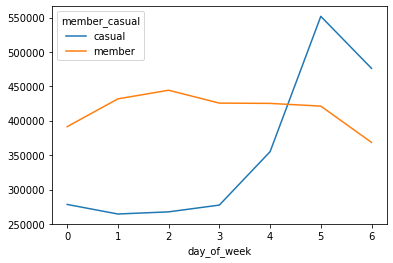

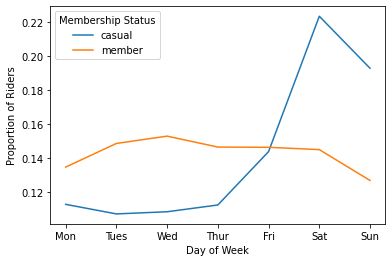

In [16]:
a, b = day_of_week_by_member.plot(legend=True), day_of_week_by_member_norm.plot(legend=True)
b.set_xlabel("Day of Week")
b.set_ylabel("Proportion of Riders")
b.legend(title="Membership Status")
b.set_xticklabels(["", "Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"])
b

In [17]:
count = {}
for day in range(7):
    count[day] = len(df[df['day_of_week'] == day])

count

{0: 669649, 1: 696199, 2: 711872, 3: 703015, 4: 780238, 5: 973172, 6: 844689}

In [18]:
member_casual_dbl_count, stations, lat_coords, lng_coords = [None]*(len(df)*2), [None]*(len(df)*2), [None]*(len(df)*2), [None]*(len(df)*2)
member_casual_dbl_count[::2], stations[::2], lat_coords[::2], lng_coords[::2] = df['member_casual'], df['start_station_name'], df['start_lat'], df['start_lng']
member_casual_dbl_count[1::2], stations[1::2], lat_coords[1::2], lng_coords[1::2] = df['member_casual'], df['end_station_name'], df['end_lat'], df['end_lng']
station_interactions = pd.DataFrame(data={'member_casual': member_casual_dbl_count, 'station': stations, 'latitude': lat_coords, 'longitude': lng_coords})
station_interactions.head()

,member_casual,station,latitude,longitude
0,casual,Dearborn St & Erie St,41.894177,-87.629127
1,casual,St. Clair St & Erie St,41.894434,-87.623379
2,casual,Franklin St & Illinois St,41.890959,-87.635343
3,casual,Noble St & Milwaukee Ave,41.900675,-87.662480
4,casual,Lake Shore Dr & Monroe St,41.880983,-87.616754


In [19]:
unique_stations = df['start_station_name'].drop_duplicates(inplace=False)
unique_stations = unique_stations.dropna()

station_coords = {}
for station in unique_stations:
    station_coords[station] = [station_interactions[station_interactions['station'] == station].iloc[0, 2], station_interactions[station_interactions['station'] == station].iloc[0, 3]]

len(station_coords)

KeyboardInterrupt: 

In [ ]:
for station, coords in station_coords.items():
    station_interactions.loc[station_interactions['station'] == station, 'latitude'] = coords[0]
    station_interactions.loc[station_interactions['station'] == station, 'longitude'] = coords[1]

In [ ]:
# station_interactions.to_csv("cyclistic_station_interactions.csv")